__author__ = Steven Carriger, __version__ = Fall 2022, __date__ = 31/10/22

Question 1:

__PROBLEM STATEMENT:__

Everyone has a fear of obtaining or developing a medical condition. Whether it be diabetes, memory loss, neuropathy, or cancer. I want to analyze and see if there is a way to predict what symptoms or features people have that could lead to lung cancer. This way, we can further understand how these features/symptoms impacts us and how to help prevent it earlier.

__Dataset Description:__

This data set is found on Kaggle and is a survey on people with certain symptoms and features recorded in the dataset. The dataset is already set to an all numeric response with the answer 'Yes' being 2 and 'No' being 1 in the dataset (Except for the result of if they have lung cancer or not where the answer is either YES or NO). 

__Source_Link:__

https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

__Target_Variable__:

I will be focusing on the variable 'LUNG_CANCER' to see which symptoms or features lead to a higher likelyhood of people getting lung cancer.

__Prediction_Goal__:

I want to be able to build a model with around 85% accuracy to ensure a high quality prediction given the matter of what I want to predict.

In [1]:
#Imports for the project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('survey lung cancer.csv')
targe_variable = 'LUNG_CANCER'
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


NUMERICAL VALUES:



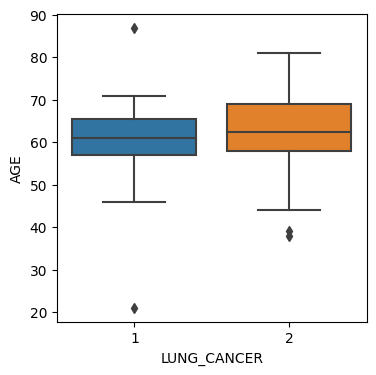



CATEGORICAL VALUES:



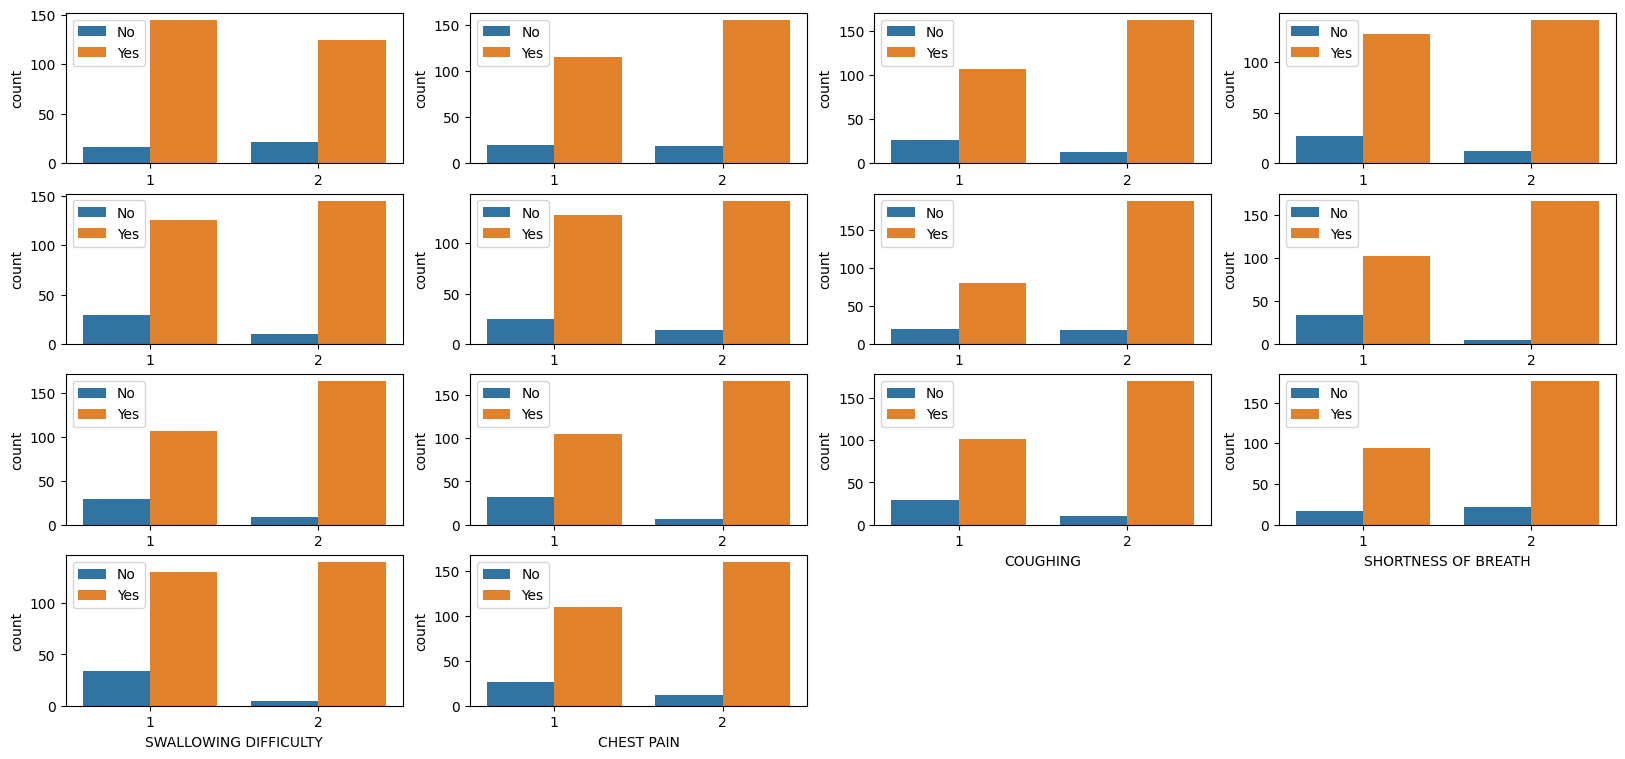



RESULTS:


From the observations of the boxplot we find that there is no noticeable outlier that needs to be addressed.

From the observations on the bar charts, we can conclude there are no significant outliers to remove.


Size before cleaning the data: (309, 16)

Size after cleaning the data: (309, 16)

The resulting dataframe after cleaning the data:



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


In [2]:
#Question 2 Data Cleaning
size_before = df.shape;

#Replacing values with numerical values 1 and 2 (NO = 1, YES = 2) and the Gender variables with (M = 1, F = 2) 
df = df.replace({'NO' : 1, 'YES' : 2, 'M' : 1, 'F' :  2})

#Dropping rows with null variables
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#Plotting numerical features/symptoms on a boxplot
print('NUMERICAL VALUES:\n')

fig=plt.figure(figsize=(4,4))
chart=sns.boxplot(x=targe_variable,y='AGE', data=df)
plt.show()

print('\n')

#Plotting categorical values with bar charts
print('CATEGORICAL VALUES:\n')
cat_list = df.loc[:, ~df.columns.isin(['AGE', targe_variable])].columns

fig=plt.figure(figsize=(20,9))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(4,4,i+1)
    chart=sns.countplot(x=column, hue=targe_variable, data=df)
    plt.legend(loc='upper left', labels=['No', 'Yes'])
plt.show()

print('\n')

#Displaying results and conclusions.
print('RESULTS:\n')
print('\nFrom the observations of the boxplot we find that there is no noticeable outlier that needs to be addressed.\n')
print('From the observations on the bar charts, we can conclude there are no significant outliers to remove.\n')

size_after = df.shape

print('\nSize before cleaning the data:', size_before)
print('\nSize after cleaning the data:', size_after)
print('\nThe resulting dataframe after cleaning the data:\n')
df

In [3]:
#Question 3 uses tests and graphs to reduce the dimension of the variables
size_before = df.shape;

#Using ANOVA test to determine if the numerical features or symptoms needs to be removed
x = df.loc[:, ['AGE']]
y = df.loc[:, targe_variable]

fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
np.set_printoptions(suppress = True)

#Using Chi-squared test to determine which categorical symptoms or features need to be removed
x = df.loc[:, cat_list]
y = df.loc[:, targe_variable]

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)

#Dropping all values that have a p_score larger than 0.05
drop_values = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING', 'CHEST PAIN']
df = df.drop(drop_values, axis = 1)

#Displaying results of the tests
print('\nChi-squared test result scores:\n', catFeatures.scores_)
print('\nANOVA test f-scores are:\n', bestFeatures.scores_)

print('\nChi-squared test result p_values:\n', catFeatures.pvalues_)
print('\nANOVA test p-values are:\n', bestFeatures.pvalues_)

print('\nThe values that do not have a significant difference according to the results of the tests are:\n', drop_values)
print('\nThe symptoms COUGHING, SHORTNESS OF BREATH, and SWALLOWING DIFFICULTY are being kept even though their p-values are greater than .05 because of their relevancy.')
size_after = df.shape
print('\nNumber of columns before removing the features:', size_before[1])
print('\nNumber of columns after removing the features:', size_after[1])


Chi-squared test result scores:
 [0.2362142  0.16461397 1.58710195 1.08315519 1.78718133 0.63118463
 0.92249665 5.26296889 3.04472698 4.07844235 2.9462817  0.15992178
 3.53345382 1.77692485]

ANOVA test f-scores are:
 [2.47702638]

Chi-squared test result p_values:
 [0.62695389 0.68494359 0.20774067 0.29799279 0.18126997 0.42692112
 0.33682029 0.02178383 0.08099973 0.04343368 0.08607539 0.68922854
 0.06014238 0.18252739]

ANOVA test p-values are:
 [0.11655043]

The values that do not have a significant difference according to the results of the tests are:
 ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'WHEEZING', 'CHEST PAIN']

The symptoms COUGHING, SHORTNESS OF BREATH, and SWALLOWING DIFFICULTY are being kept even though their p-values are greater than .05 because of their relevancy.

Number of columns before removing the features: 16

Number of columns after removing the features: 6


In [4]:
#Question 3 cont.

#Normalizing the data
print('It is not necessary to normalize the data since all values are categorical.')

#Making dummy variables
df = pd.get_dummies(df, columns=['ALLERGY ', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY'], drop_first=True)
print('\nThere is a need to make all of the variables dummy variables because their categorical values are not one and zero.\n')

#Checking for any high correlation with the remaining categorical features (This will create a model).
x = df.loc[:, df.columns!=targe_variable]
y = df[targe_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)   

os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_sample(x_train, y_train)

model = LogisticRegression(penalty='none', max_iter=5000)
model.fit(oversampled_x, oversampled_y.values.ravel())

print('Categorical coefficient:\n', pd.DataFrame(data={'variable': x_train.columns, 'coefficient': model.coef_[0]}))
print('The intercept is:', model.intercept_)

It is not necessary to normalize the data since all values are categorical.

There is a need to make all of the variables dummy variables because their categorical values are not one and zero.

Categorical coefficient:
                   variable  coefficient
0               ALLERGY _2    -0.032130
1      ALCOHOL CONSUMING_2    -0.031503
2               COUGHING_2    -0.047817
3    SHORTNESS OF BREATH_2     0.033370
4  SWALLOWING DIFFICULTY_2    -0.048276
The intercept is: [0.32632929]


In [5]:
#Question 4

#Builds the model and calculates the results.
prediction_model = LogisticRegression(penalty='none', max_iter=2000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8, stratify=y)
prediction_model.fit(x_train, y_train)

results = []
for i in range(0, 10):
    test_pred = prediction_model.predict(x_test)
    score = f1_score(y_test, test_pred)
    results.append(score)

#Displays the accuracy of the model
print('The average f1 score of the prediction model is:', round((sum(results) / len(results)), 2) * 100,'%')

#Responses
print('\nThe data did require to be balanced and has been balanced by now.')
print('\nIt is more appropriate to use a train_test_split for this model because of the categorical variables being used.\n')
print('The LogisticRegression algorithm will be the best fit for this problem.\n')
print('The metric I use is to evaluate the prediction model is the f1 score of the model.')

The average f1 score of the prediction model is: 75.0 %

The data did require to be balanced and has been balanced by now.

It is more appropriate to use a train_test_split for this model because of the categorical variables being used.

The LogisticRegression algorithm will be the best fit for this problem.

The metric I use is to evaluate the prediction model is the f1 score of the model.


Question 5 Conclusion

__Link_To_Repository__:


link will be included when finished


__Video_Explanation__: 


The video is attached to the folder.

__Closing_Statement__:

While I wasn't able to get a model close to as accurate as I desired, I still was able to learn and observe some interesting things from this dataset. I was able to conclude that Allergies and Alcohol Consumption played a bigger role than I expected in affecting those who had lung cancer. I honestly didn't expect the allergies or alcohol consumption features to be what I would end up using until the results. Now I am left with more questions about my findings and how it applies to what little I know about cancer. "What allergies cause this?", "How much common alcohol consumption would be necessary for it to be relevant?", and "Could this just be the dataset and the location the data was collected?" While I assumed those who smoked, or who were wheezing and coughing would be some obvious factors in lung cancer, I just never thought it could also be allergies or alcohol consumption.

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).
- DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
- If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.
By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.
 
Steven Carriger